# 01 - EDA
Carga datos y genera estad?sticos y gr?ficos b?sicos.

In [7]:
import os, glob
print("CWD:", os.getcwd())
print("PNG:", glob.glob("outputs/figures/*.png"))


CWD: c:\Users\joelm\Documents\geostats
PNG: ['outputs/figures\\hist_var.png', 'outputs/figures\\kriging_estimate.png', 'outputs/figures\\qq_var.png', 'outputs/figures\\variogram.png', 'outputs/figures\\xy_scatter.png']


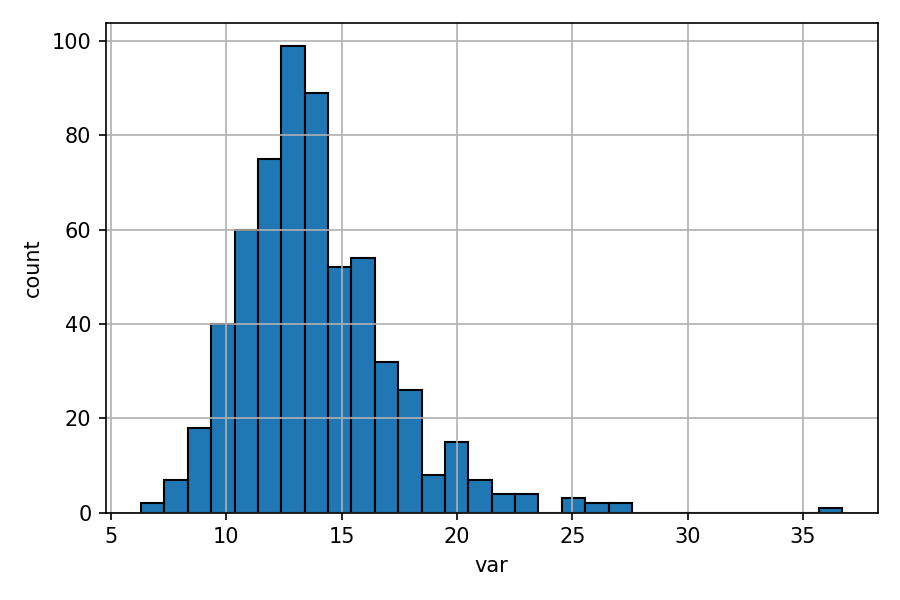

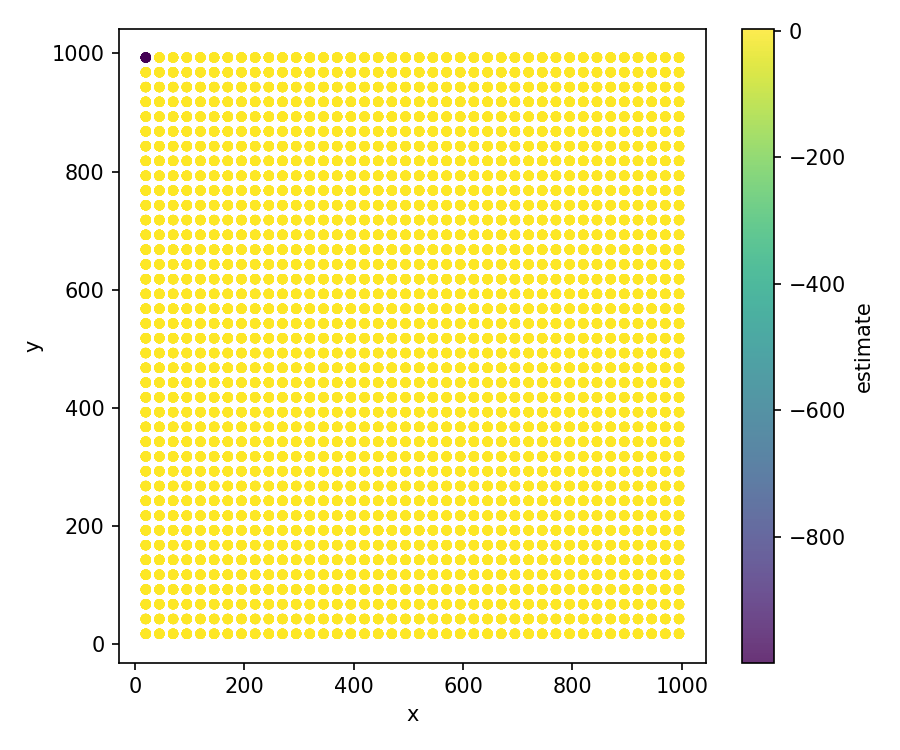

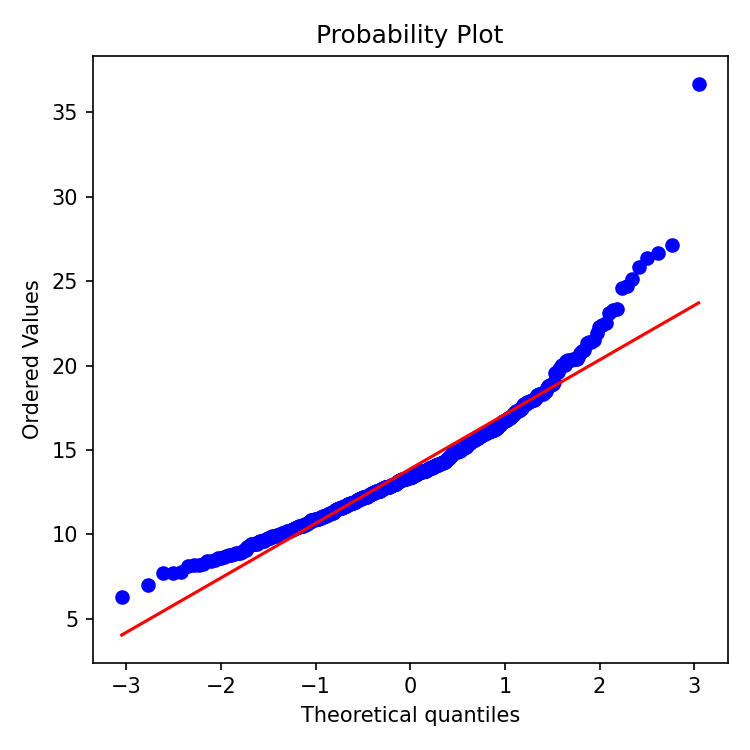

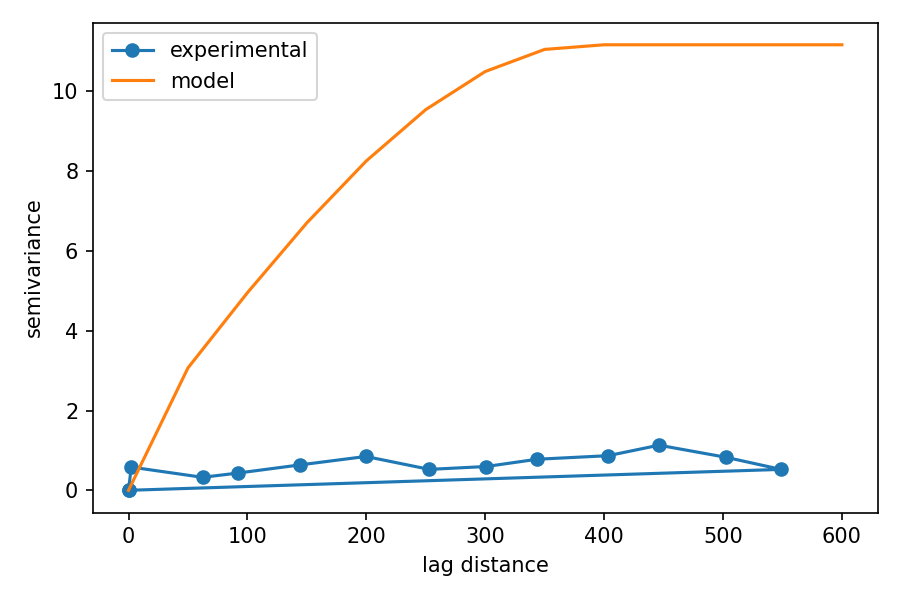

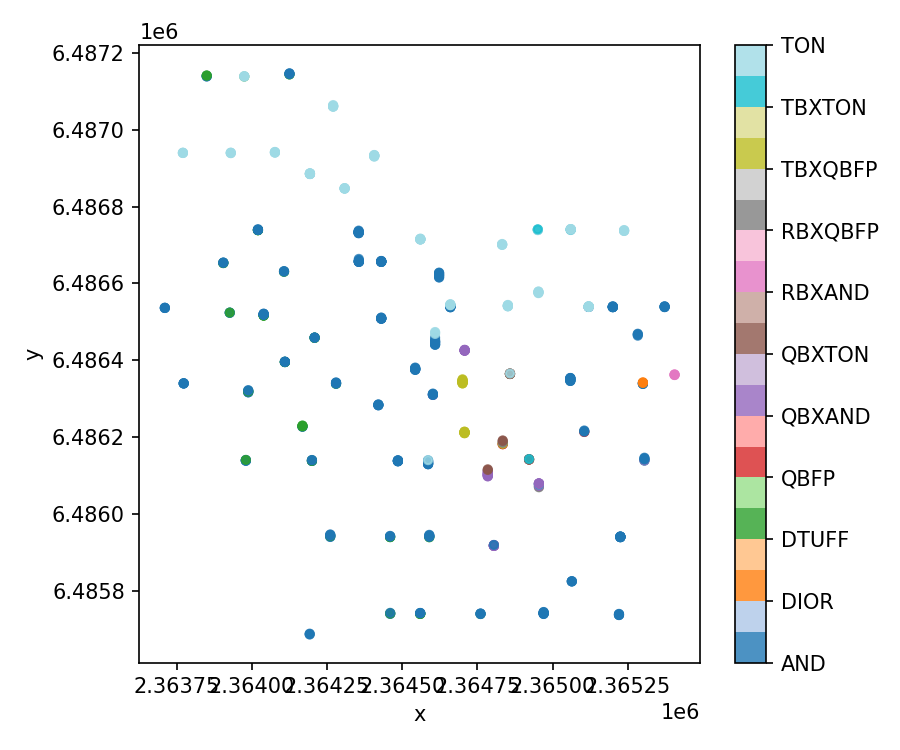

In [8]:
from IPython.display import Image, display
import glob

for p in glob.glob("outputs/figures/*.png"):
    display(Image(filename=p))


In [5]:
import os, sys, json

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(PROJECT_ROOT)
else:
    PROJECT_ROOT = os.getcwd()

sys.path.insert(0, PROJECT_ROOT)

In [6]:
from src.io_utils import read_csv_robust, standardize_columns, coerce_numeric
from src.eda import apply_topcut, basic_stats, plot_hist, plot_qq, plot_xy_scatter

with open("config/project.json", "r", encoding="utf-8") as f:
    cfg = json.load(f)

if not os.path.exists(cfg["data_csv_path"]):
    from src.make_demo_data import make_demo_csv
    make_demo_csv(cfg["data_csv_path"])

df = read_csv_robust(cfg["data_csv_path"])

mapping = {
    "x": cfg["columns"].get("x"),
    "y": cfg["columns"].get("y"),
    "z": cfg["columns"].get("z"),
    "var": cfg["columns"].get("variable_objetivo"),
    "domain": cfg["columns"].get("domain"),
}

df = standardize_columns(df, mapping)

df.replace(cfg.get("nodata_values", []), None, inplace=True)
coerce_numeric(df, ["x", "y", "z", "var"])
df.dropna(subset=["x", "y", "var"], inplace=True)

if cfg.get("topcut", {}).get("enabled") and cfg.get("topcut", {}).get("high"):
    df = apply_topcut(df, "var", float(cfg["topcut"]["high"]))

stats = basic_stats(df["var"])
print(stats)

os.makedirs("outputs/figures", exist_ok=True)
plot_hist(df["var"], "outputs/figures/hist_var.png")
plot_qq(df["var"], "outputs/figures/qq_var.png")
plot_xy_scatter(df, "x", "y", "var", "outputs/figures/xy_scatter.png", color_by="domain")

{'count': 600.0, 'mean': 13.876017316666667, 'std': 3.3420727873812917, 'min': 6.31005, 'p10': 10.21523, 'p50': 13.3933, 'p90': 17.91471, 'max': 36.7074}
